# Chapter 6

We will explore deep-learning models that can process 

* Text (understood as sequences of word or sequences of characters), 
* Timeseries, and 
* Sequence data in general. 

The two fundamental deep-learning algorithms for sequence processing
are 
1. Recurrent neural networks (RNN) and 
2. 1D convnets, the one-dimensional version of the 2D convnets.

We’ll discuss both of these approaches. 

Applications of these algorithms include the following:

* **Document classification** and **timeseries classification**, such as  identifying the topic of an article or the author of a book
* **Timeseries comparisons**, such as estimating how closely related two documents or two stock tickers are
* **Sequence-to-sequence learning**, such as decoding an English sentence into French
* **Sentiment analysis**, such as classifying the sentiment of tweets or movie reviews as positive or negative
* **Timeseries forecasting**, such as predicting the future weather at a certain location, given recent weather data

We will focus on two narrow tasks: 
1. Sentiment analysis on the IMDB dataset and 
2. Temperature forecasting. 

But the techniques demonstrated for these two tasks are relevant to all the applications just listed, and many more

#### Working with text data

Text is one of the most widespread forms of sequence data. It can be understood as either 

* a sequence of characters or
* a sequence of words.

But it’s most common to work at the level of words. 

The deep-learning sequence-processing models can use text to produce a basic form of natural-language understanding, sufficient for applications including 

* Document classification, 
* Sentiment analysis, 
* Author identification, and even
* Question-Answering (QA) (in a constrained context). 

Keep in mind that none of these deeplearning models truly understand text in a human sense; rather, these models can map the statistical structure of written language, which is sufficient to solve many simple textual tasks.

Deep learning for natural-language processing is pattern recognition, applied in much the same way that computer vision is pattern recognition applied to pixels. It applies to

* Words, 
* Sentences, and 
* Paragraphs, 

Like all other neural networks, deep-learning models don’t take as input raw text: they only work with numeric tensors. Vectorizing text is the process of transforming text into numeric tensors. This can be done in multiple ways:
* Segment text into words, and transform each word into a vector.
* Segment text into characters, and transform each character into a vector.
* Extract n-grams of words or characters, and transform each n-gram into a vector.
    * N-grams are overlapping groups of multiple consecutive words or characters

Collectively, the different units into which we can break down text (words, characters, or n-grams) are called **tokens**, and breaking text into such tokens is called **tokenization**. 

All text-vectorization processes consist of applying some tokenization scheme and
then associating numeric vectors with the generated tokens. These vectors, packed
into sequence tensors, are fed into deep neural networks. 

There are multiple ways to associate a vector with a token. Two major ones: 

* One-hot encoding of tokens, and 
* Token embedding (typically used exclusively for words, and called **word embedding**). 

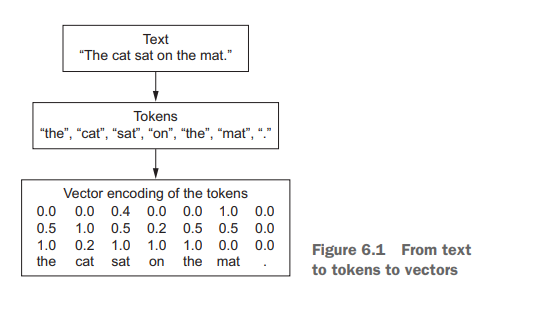

### Understanding n-grams and bag-of-words

**Word n-grams** are groups of **N** (or fewer) consecutive words that we can extract from
a sentence. The same concept may also be applied to characters instead of words.
Here’s a simple example. Consider the sentence 

`The cat sat on the mat`. 

It may be decomposed into the following set of 2-grams:

`{"The", "The cat", "cat", "cat sat", "sat","sat on", "on", "on the", "the", "the mat", "mat"}`

It may also be decomposed into the following set of 3-grams:

`{"The", "The cat", "cat", "cat sat", "The cat sat","sat", "sat on", "on", "cat sat on", "on the", "the", "sat on the", "the mat", "mat", "on the mat"}`

Such a set is called a **bag-of-2-grams** or **bag-of-3-grams**, respectively. The term bag
here refers to the fact that we’re dealing with a **set of tokens** rather than a list or
sequence: the tokens have no specific order. This family of tokenization methods is
called **bag-of-words**.

Because bag-of-words isn’t an order-preserving tokenization method (the tokens generated are understood as a set, not a sequence, and the general structure of the sentences is lost), it tends to be used in **shallow language-processing models** rather than
in **deep-learning models**.

Extracting n-grams is a form of feature engineering, and
deep learning does away with this kind of rigid, brittle approach, replacing it with hierarchical feature learning. 

**One-dimensional convnets (1D convnets)** and **recurrent neural networks (RNN)**, are capable of learning representations for groups of
words and characters without being explicitly told about the existence of such groups,
by looking at continuous word or character sequences. 

For this reason, we won’t
cover n-grams any further. But do keep in mind that they’re a powerful,
unavoidable feature-engineering tool when using lightweight, shallow text-processing
models such as **logistic regression** and **random forests**.

### One-hot encoding of words and characters

One-hot encoding is the most common, most basic way to turn a token into a vector.
We saw it in action in the initial IMDB and Reuters examples (done with
words, in that case). 

It consists of associating a unique integer index with every word
and then turning this integer index `i` into a binary vector of size `N` (the size of the
vocabulary); 
* The vector is all zeros except for the **ith** entry, which is `1`.
 
Of course, one-hot encoding can be done at the character level, as well.

In [1]:
# Word-level one-hot encoding (toy example)

import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}

for sample in samples: # tokeninzation
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

In [2]:
print(token_index) 

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework.': 10}


In [3]:
max_length = 10
results = np.zeros(shape=(len(samples),max_length,max(token_index.values()) + 1))

for i, sample in enumerate(samples):
    for j, word in enumerate(sample.split()):
        index = token_index.get(word)
        results[i, j, index] = 1.

In [4]:
print(results)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [27]:
# Character-level one-hot encoding (toy example)

import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable

token_index = dict(zip(range(1, len(characters) + 1), characters)) # tokeninzation

# book code seems wrong. it should be 

# token_index = dict(zip(characters,range(1, len(characters) + 1) ))

In [28]:
print(token_index) 

{1: '0', 2: '1', 3: '2', 4: '3', 5: '4', 6: '5', 7: '6', 8: '7', 9: '8', 10: '9', 11: 'a', 12: 'b', 13: 'c', 14: 'd', 15: 'e', 16: 'f', 17: 'g', 18: 'h', 19: 'i', 20: 'j', 21: 'k', 22: 'l', 23: 'm', 24: 'n', 25: 'o', 26: 'p', 27: 'q', 28: 'r', 29: 's', 30: 't', 31: 'u', 32: 'v', 33: 'w', 34: 'x', 35: 'y', 36: 'z', 37: 'A', 38: 'B', 39: 'C', 40: 'D', 41: 'E', 42: 'F', 43: 'G', 44: 'H', 45: 'I', 46: 'J', 47: 'K', 48: 'L', 49: 'M', 50: 'N', 51: 'O', 52: 'P', 53: 'Q', 54: 'R', 55: 'S', 56: 'T', 57: 'U', 58: 'V', 59: 'W', 60: 'X', 61: 'Y', 62: 'Z', 63: '!', 64: '"', 65: '#', 66: '$', 67: '%', 68: '&', 69: "'", 70: '(', 71: ')', 72: '*', 73: '+', 74: ',', 75: '-', 76: '.', 77: '/', 78: ':', 79: ';', 80: '<', 81: '=', 82: '>', 83: '?', 84: '@', 85: '[', 86: '\\', 87: ']', 88: '^', 89: '_', 90: '`', 91: '{', 92: '|', 93: '}', 94: '~', 95: ' ', 96: '\t', 97: '\n', 98: '\r', 99: '\x0b', 100: '\x0c'}


In [7]:
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))

for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [8]:
print(results)

[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


Note that **Tensorflow/Keras** has built-in utilities for doing one-hot encoding of text at the word level or character level, starting from raw text data.

We should use these utilities, because
they take care of a number of important features such as 
* stripping special characters from strings and 
* Only taking into account the **N** most common words in our dataset (a common restriction, to avoid dealing with very large input vector spaces).

In [1]:
# Using Tensorflow/Keras for word-level one-hot encoding

from tensorflow.keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000) # 1000 most common words 
tokenizer.fit_on_texts(samples)

In [2]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [4]:
print(word_index )

{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


In [5]:
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

In [9]:
print(sequences)
one_hot_results.shape

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]


(2, 1000)

In [23]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

A **variant of one-hot encoding** is the so-called **one-hot hashing trick**, which we can use
when the number of unique tokens in our vocabulary is too large to handle explicitly.

Instead of explicitly assigning an index to each word and keeping a reference of these
indices in a dictionary, we can hash words into vectors of fixed size. This is typically
done with a very lightweight hashing function. 

* The main advantage of this method is that it does away with maintaining an explicit word index, which saves memory and allows online encoding of the data (we can generate token vectors right away, before we’ve seen all of the available data). 
* The one drawback of this approach is that it’s susceptible to hash collisions: two different words may end up with the same hash, and subsequently any machine-learning model looking at these hashes won’t be able to tell the difference between these words. The likelihood of hash collisions decreases when the dimensionality of the hashing space is much larger than the total number of unique tokens being hashed.

In [11]:
# Word-level one-hot encoding with hashing trick (toy example)

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [12]:
print(results)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


### Using word embeddings

Another popular and powerful way to associate a vector with a word is the use of dense
word vectors, also called **word embeddings**. 

* Whereas the **vectors obtained through one-hot encoding are binary, sparse (mostly made of zeros)**, and very high-dimensional (same dimensionality as the number of words in the vocabulary), 
* **Word embeddings** are low dimensional floating-point vectors (that is, **dense vectors**, as opposed to sparse vectors).

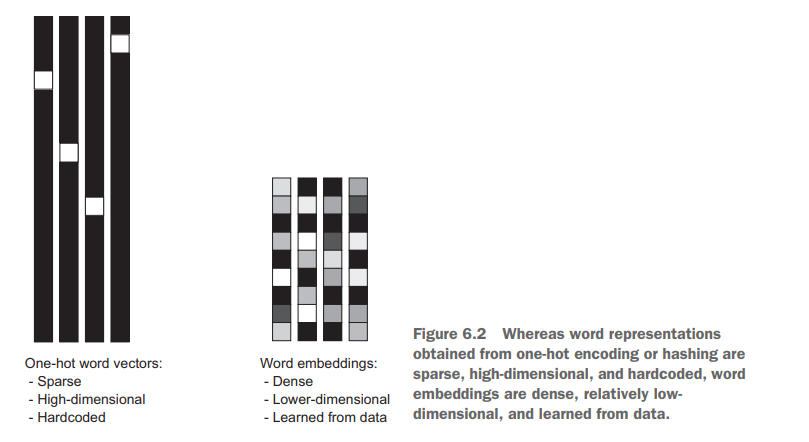

Unlike the word vectors obtained via one-hot encoding, word
embeddings are learned from data. It’s common to see word embeddings that are
* 256-dimensional, 
* 512-dimensional, or 
* 1,024-dimensional when dealing with very large
vocabularies. 

On the other hand, one-hot encoding words generally leads to vectors
that are 
* 20,000-dimensional or greater (capturing a vocabulary of 20,000 tokens, in this case). 

So, word embeddings pack more information into far fewer dimensions.

There are two ways to obtain word embeddings:
1. Learn word embeddings jointly with the main task we care about (such as document classification or sentiment prediction). In this setup, we start with random word vectors and then learn word vectors in the same way we learn the weights of a neural network.
2. Load into our model word embeddings that were precomputed using a different machine-learning task than the one we’re trying to solve. These are called **pretrained word embeddings**.

#### 1. LEARNING WORD EMBEDDINGS WITH THE EMBEDDING LAYER

The simplest way to associate a dense vector with a word is to choose the vector at
random. The problem with this approach is that the resulting embedding space has
no structure: 

For instance, the words **accurate** and **exact** may end up with completely
different embeddings, even though they’re interchangeable in most sentences. It’s
difficult for a deep neural network to make sense of such a noisy, unstructured
embedding space.

To get a bit more abstract, the geometric relationships between word vectors
should reflect the semantic relationships between these words. Word embeddings are
meant to map human language into a geometric space. 

For instance, in a reasonable
embedding space, we would expect synonyms to be embedded into similar word vectors; and in general, we would expect the geometric distance (such as L2 distance)
between any two word vectors to relate to the semantic distance between the associated words (words meaning different things are embedded at points far away from
each other, whereas related words are closer). 

In addition to distance, we may want
specific **directions** in the embedding space to be meaningful. To make this clearer, let’s
look at a concrete example.

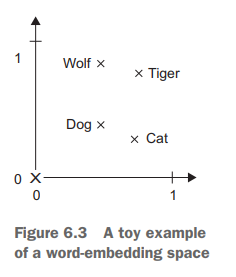

In figure above, four words are embedded on a 2D plane:
* cat, 
* dog, 
* wolf, and 
* tiger.

With the vector representations we
chose here, some semantic relationships between these
words can be encoded as geometric transformations.

For instance, the same vector allows us to go 
* from cat to tiger and 
* from dog to wolf

This vector could be interpreted as the **from pet to wild animal** vector. Similarly, another vector
lets us go from dog to cat and from wolf to tiger, which could
be interpreted as a **from canine to feline** vector.
 
In real-world word-embedding spaces, common examples of meaningful geometric transformations are 
* gender vectors and 
* plural vectors. 

For instance, 

* By adding a **female** vector to the vector
**king**, we obtain the vector **queen**. 
* By adding a **plural** vector, we obtain **kings**.

Word-embedding spaces typically feature thousands of such interpretable and potentially useful vectors.

Is there some ideal word-embedding space that would perfectly map human language and could be used for any natural-language-processing task? 

Possibly, but we have yet to compute anything of the sort. Also, there is no such a thing as human language—there are many different languages, and they aren’t isomorphic, because a language is the reflection of a specific culture and a specific context. 

But more pragmatically, what makes a good word-embedding space depends heavily on our task:

* The perfect word-embedding space for an English-language movie-review sentiment analysis model may look different from the perfect embedding space for an English-language legal-document-classification model, because the importance of certain semantic relationships varies from task to task.

It’s thus reasonable to learn a new embedding space with every new task. Fortunately, backpropagation makes this easy, and **Tensorflow/Keras** makes it even easier. It’s about
learning the weights of a layer: the **Embedding layer**.

In [13]:
# Instantiating an Embedding layer

from tensorflow.keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

The Embedding layer takes at least two
arguments: 
1. The number of possible tokens
(here, 1,000: starting from 1 till maximum word index)
and 
2. The dimensionality of the embeddings
(here, 64).

The Embedding layer is best understood as a dictionary that maps integer indices
(which stand for specific words) to dense vectors. It takes integers as input, it looks up
these integers in an internal dictionary, and it returns the associated vectors. It’s effectively a dictionary lookup 

`Word index -> Embedding layer -> Corresponding word vector` # The Embedding layer

The Embedding layer takes as input a 2D tensor of integers, of shape `(samples,sequence_length)`, where each entry is a sequence of integers. It can embed
sequences of variable lengths.

For instance, we could feed into the Embedding layer in
the previous example batches with shapes `(32, 10)` (batch of 32 sequences of length
10) or `(64, 15)` (batch of 64 sequences of length 15). 

All sequences in a batch must have the same length, though (because we need to pack them into a single tensor), so sequences that are shorter than others should be padded with zeros, and sequences
that are longer should be truncated.

This layer returns a 3D floating-point tensor of shape `(samples, sequence_length, embedding_dimensionality)`. Such a 3D tensor can then be processed by
an **RNN layer** or a **1D convolution layer**.

When we instantiate an Embedding layer, its **weights (its internal dictionary of
token vectors)** are initially random, just as with any other layer. During training, these
word vectors are gradually adjusted via backpropagation, structuring the space into
something the downstream model can exploit. Once fully trained, the embedding
space will show a lot of structure—
* A kind of structure specialized for the specific problem for which we’re training our model.
 
Let’s apply this idea to the IMDB movie-review sentiment-prediction task that
we’re already familiar with. 
* First, we’ll quickly prepare the data. 
* We’ll restrict the movie reviews to the top 10,000 most common words (as we did the first time we worked with this dataset) and cut off the reviews after only 20 words. 
* The network will learn 8-dimensional embeddings for each of the 10,000 words, 
    * Turn the input integer sequences (2D integer tensor) into embedded sequences (3D float tensor)
    * Flatten the tensor to 2D, and 
    * Train a single Dense layer on top for classification.

In [14]:
# Loading the IMDB data for use with an Embedding layer

from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

max_features = 10000 # Number of words to consider as features
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) # Loads the data as lists of integers

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must 

In [15]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [16]:
print(x_train.ndim)
print(x_train[0])

1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [17]:
maxlen = 20 # Cuts off the text after this number of words (among the max_features most common words)

# Turns the lists of integers into a 2D integer tensor of shape (samples, maxlen)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [18]:
x_train

array([[  65,   16,   38, ...,   19,  178,   32],
       [  23,    4, 1690, ...,   16,  145,   95],
       [1352,   13,  191, ...,    7,  129,  113],
       ...,
       [  11, 1818, 7561, ...,    4, 3586,    2],
       [  92,  401,  728, ...,   12,    9,   23],
       [ 764,   40,    4, ...,  204,  131,    9]])

In [19]:
print(x_train.ndim)
x_train[0]

2


array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32])

In [20]:
x_train.shape

(25000, 20)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

model = Sequential()

# Specifies the maximum input length to the Embedding layer so we can later flatten the embedded inputs. 
# After the Embedding layer, the activations have shape (samples, maxlen, 8).
model.add(Embedding(10000, 8, input_length=maxlen)) # here number of tokens are 10000, dimentionality is 8 and each input as 20 words 

# Flattens the 3D tensor of embeddings into a 2D tensor of shape (samples, maxlen * 8)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid')) # Adds the classifier on top

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.6875 - acc: 0.5522 - val_loss: 0.6322 - val_acc: 0.6884
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5821 - acc: 0.7404 - val_loss: 0.5344 - val_acc: 0.7220
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4814 - acc: 0.7769 - val_loss: 0.5047 - val_acc: 0.7426
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4269 - acc: 0.8082 - val_loss: 0.4962 - val_acc: 0.7512
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3923 - acc: 0.8288 - val_loss: 0.4954 - val_acc: 0.7548
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3620 - acc: 0.8462 - val_loss: 0.4985 - val_acc: 0.7568
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3429 - acc: 0.8572 - val_loss: 0.5040 - val_acc: 0.7522
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.

We get to a validation accuracy of `88%`, which is pretty good considering that we’re
only looking at the first 20 words in every review. But note that merely flattening the
embedded sequences and training a single Dense layer on top leads to a model that
treats each word in the input sequence separately, without considering inter-word
relationships and sentence structure (for example, this model would likely treat both
**this movie is a bomb** and **this movie is the bomb** as being negative reviews).

It’s much better to add recurrent layers or 1D convolutional layers on top of the embedded sequences to learn features that take into account each sequence as a whole. That’s what we’ll focus on in the next section. 